# Predict a possible heart disease

In [ ]:
!pip install scikit-learn
!pip install pandas numpy
!pip install --upgrade matplotlib

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import log_loss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load The Dataset

In [ ]:
# Load The Dataset
data = pd.read_csv('/content/drive/My Drive/heart.csv')

In [ ]:
# Basic Data Overview
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [ ]:
# Checking for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# Check for duplicate data
print(data.duplicated().sum())

0


In [ ]:
# View basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


## Feature Engineering

In [ ]:
# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
# Convert FastingBS to string (categorical type)
data['FastingBS'] = data['FastingBS'].astype(str)

In [ ]:
# Verify the change
print(data['FastingBS'].dtypes)

object


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [ ]:
# Initialize the OneHotEncoder without sparse_output
encoder = OneHotEncoder(handle_unknown='ignore') # Remove sparse_output argument

# Apply one-hot encoding to the categorical columns
encoded_categorical = encoder.fit_transform(data[categorical_cols])

#Check if the encoded_categorical is sparse, if so, convert to dense array
encoded_categorical = encoded_categorical.toarray() if hasattr(encoded_categorical, "toarray") else encoded_categorical


# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols), index=data.index)

# Drop the original categorical columns from the dataset
data.drop(columns=categorical_cols, inplace=True)

# Combine the encoded features with the original dataset
data = pd.concat([data, encoded_df], axis=1)

In [ ]:
# Drop the target variable 'HeartDisease' and create a feature list
feature_list = data.drop(columns=['HeartDisease']).columns.tolist()

# Print the feature list
print("Feature List:", feature_list)

Feature List: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'FastingBS_0', 'FastingBS_1', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [ ]:
# Initialize the standardization tool
scaler = StandardScaler()

# Standardize the numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [ ]:
# Verify the results of standardization
print("\nNumerical columns mean and standard deviation after scaling:")
print("Means (should be approximately 0):")
print(data[numerical_cols].mean())
print("\nStandard deviations (should be approximately 1):")
print(data[numerical_cols].std())



Numerical columns mean and standard deviation after scaling:
Means (should be approximately 0):
Age           -1.083616e-16
RestingBP      1.954380e-16
Cholesterol    0.000000e+00
MaxHR          4.953675e-16
Oldpeak        1.238419e-16
dtype: float64

Standard deviations (should be approximately 1):
Age            1.000545
RestingBP      1.000545
Cholesterol    1.000545
MaxHR          1.000545
Oldpeak        1.000545
dtype: float64


In [ ]:
# Final feature list
print("Final Feature List:")
print(feature_list)
# Display the first few rows of the processed data
print("Processed Training Data:")
print(data.head())

Final Feature List:
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'FastingBS_0', 'FastingBS_1', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
Processed Training Data:
        Age  RestingBP  Cholesterol     MaxHR   Oldpeak  HeartDisease  Sex_F  \
0 -1.433140   0.410909     0.825070  1.382928 -0.832432             0    0.0   
1 -0.478484   1.491752    -0.171961  0.754157  0.105664             1    1.0   
2 -1.751359  -0.129513     0.770188 -1.525138 -0.832432             0    0.0   
3 -0.584556   0.302825     0.139040 -1.132156  0.574711             1    1.0   
4  0.051881   0.951331    -0.034755 -0.581981 -0.832432             0    0.0   

   Sex_M  ChestPainType_ASY  ChestPainType_ATA  ...  FastingBS_0  FastingBS_1  \
0    1.0                0.0                1.0  ...          

## Model Training

In [ ]:
pip install --upgrade xgboost scikit-learn

  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3


In [ ]:
# Step 1: Import library
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score

In [ ]:
from sklearn.model_selection import train_test_split

# Make sure `X` and `y` are defined
X = data.drop(columns=['HeartDisease'])  # feature data
y = data['HeartDisease']  # target variable

# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Initialize XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Step 2: Define parameter grid (contains scale_pos_weight parameter)
num_negative = sum(y_train == 0)
num_positive = sum(y_train == 1)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 5, 10],
    'scale_pos_weight': [1, num_negative / num_positive]  # Consider class imbalance
}

# Step 3: Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='recall',  # Use Recall as an evaluation metric
    cv=5,              # 5 fold cross validation
    verbose=1,
    n_jobs=-1          # Run in parallel
)

# Step 4: model training
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 17496 candidates, totalling 87480 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 10, 'scale_pos_weight': 1, 'subsample': 1.0}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:53:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Train the model using optimal parameters
best_params = {
    'colsample_bytree': 0.8,
    'gamma': 0,
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 50,
    'reg_alpha': 0,
    'reg_lambda': 10,
    'scale_pos_weight': 1,
    'subsample': 1.0
}

final_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    **best_params  # Unpack the best parameters
)

# Training model
final_model.fit(X_train, y_train)

# test model
y_pred_recall = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Output classification report
print("Classification Report for Recall Rate Optimized Model:")
print(classification_report(y_test, y_pred_recall))

# Calculate various indicators
accuracy = accuracy_score(y_test, y_pred_recall)
precision = precision_score(y_test, y_pred_recall)
recall = recall_score(y_test, y_pred_recall)
f1 = f1_score(y_test, y_pred_recall)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Output results
print("\nComprehensive Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Classification Report for Recall Rate Optimized Model:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        77
           1       0.82      0.92      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.84      0.83       184


Comprehensive Metrics:
Accuracy: 0.8370
Precision: 0.8235
Recall: 0.9159
F1 Score: 0.8673
ROC-AUC: 0.9272


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:06:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x800 with 0 Axes>

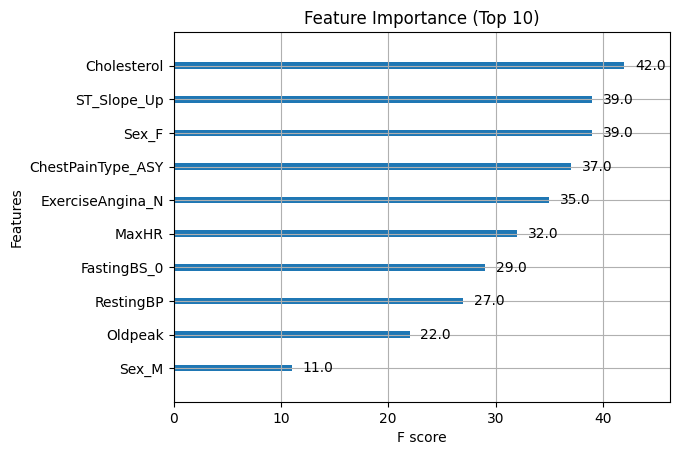

In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance

# Get feature importance
importance = final_model.get_booster().get_score(importance_type='weight')

# Sort feature importance in descending order
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Visualize feature importance (Top 10 Features)
plt.figure(figsize=(10, 8))
plot_importance(final_model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (Top 10)")
plt.show()